In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from PIL import Image
import os.path
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import load_model
import sklearn.model_selection
import cv2

This project uses "Face Mask Detection Dataset" downloaded from Kaggle at


https://www.kaggle.com/datasets/omkargurav/face-mask-dataset

# Let us first take a look at our image datasets #1

Starting with the dataset that contains people who wear a mask

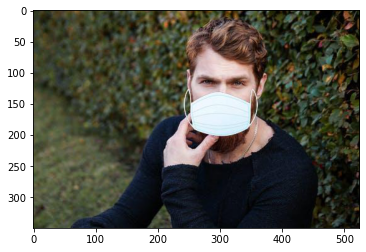

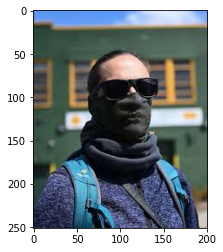

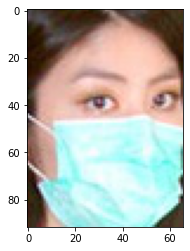

<Figure size 432x288 with 0 Axes>

In [137]:
for i in range(1,4):
    path = 'images/with_mask/with_mask_' + str(i) + '.jpg'
    if os.path.exists(path):
        img = plt.imread(path)
        plt.imshow(img)
        plt.figure()
    else:
        print(path, 'not found')

# Let us first take a look at our image datasets #2
These are the datasets that contain of people who don't wear a mask

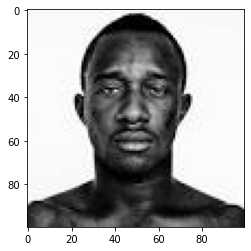

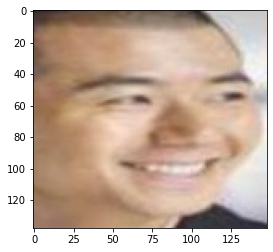

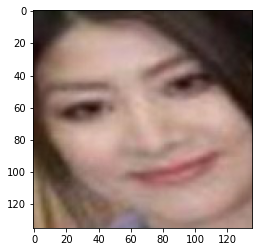

<Figure size 432x288 with 0 Axes>

In [138]:
for i in range(1,4):
    path = 'images/without_mask/without_mask_' + str(i) + '.jpg'
    if os.path.exists(path):
        img = plt.imread(path)
        plt.imshow(img)
        plt.figure()
    else:
        print(path, 'not found')

# Notice that...

The images do not have the same sizes, but they are all the same image types: jpg

Therefore, we must convert all images into the same sizes 

# # Let us make every picutre's dimension: 96,96,3
96x96 takes less time to train, and it does not shrink image to the point that it destroys it

In [139]:
x_list_mask = []
y_list_mask = []
for i in range(1,3726):
    path = 'images/with_mask/with_mask_' + str(i) + '.jpg'
    image = cv2.imread(path)
    image = cv2.resize(image, (96,96))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #store the image into an array and store the value to another array: 0 = wearing a mask
    x_list_mask.append(image)
    y_list_mask.append(0)

They now all have the same size 96x96

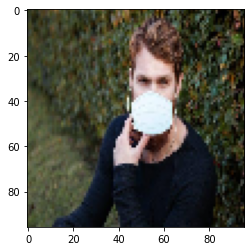

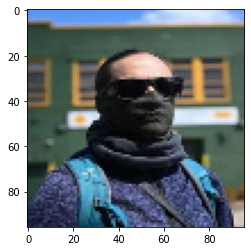

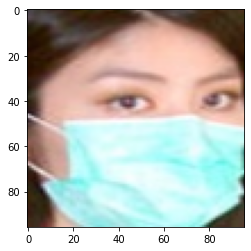

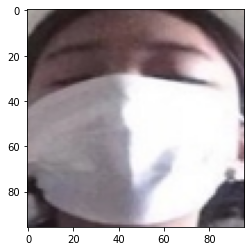

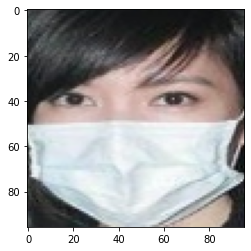

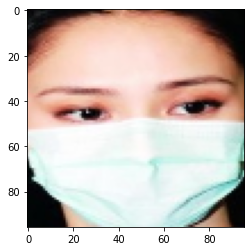

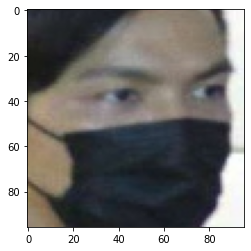

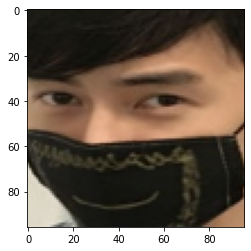

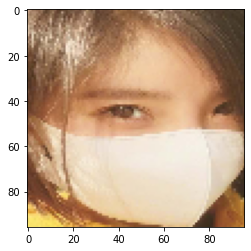

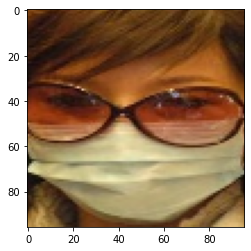

<Figure size 432x288 with 0 Axes>

In [140]:
def displaySomeSampleImage(x_list):
    for i in range(0, 10):
        plt.imshow(x_list[i])
        plt.figure()
displaySomeSampleImage(x_list_mask)

# Now onto data without mask

In [141]:
x_list_no_mask = []
y_list_no_mask = []
for i in range(1,3829):
    path = 'images/without_mask/without_mask_' + str(i) + '.jpg'
    image = cv2.imread(path)
    image = cv2.resize(image, (96,96))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    x_list_no_mask.append(image)
    y_list_no_mask.append(1)

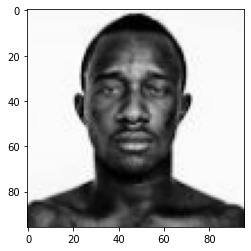

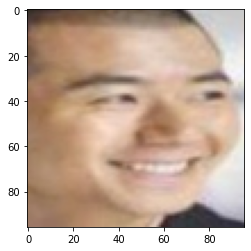

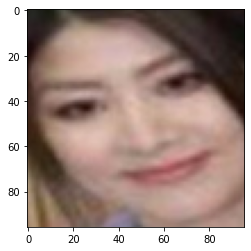

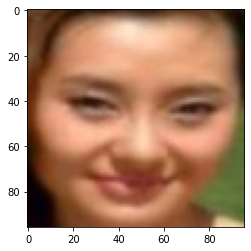

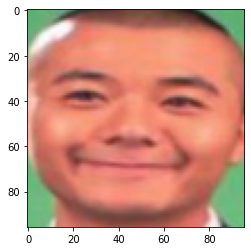

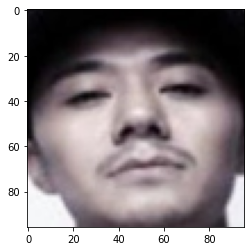

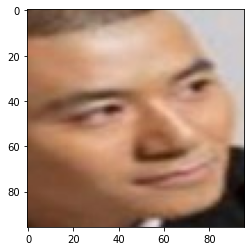

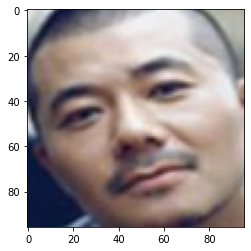

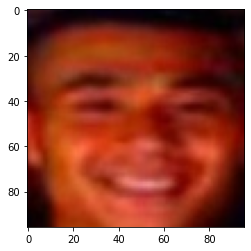

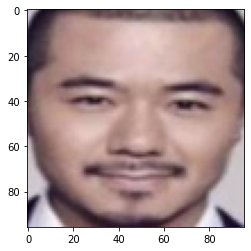

<Figure size 432x288 with 0 Axes>

In [142]:
displaySomeSampleImage(x_list_no_mask)

# Let us put all the X and y together

In [143]:
X_list = []
y_list = []
X_list.extend(x_list_mask)
X_list.extend(x_list_no_mask)
y_list.extend(y_list_mask)
y_list.extend(y_list_no_mask)

Convert the array into numpy

In [144]:
X = np.array(X_list)
y = np.array(y_list) 
print(X.shape)
print(y.shape)

(7553, 96, 96, 3)
(7553,)


# Let us now split the X and y into training set and testing set

training consists of 80% of data

testing consists of 20% of data

In [145]:
X_trn, X_tst, y_trn, y_tst = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [146]:
y_trn = y_trn.ravel()
y_tst = y_tst.ravel()
print('X_trn has shape:', X_trn.shape)
print('y_trn has shape: ', y_trn.shape)
print('X_tst has shape:', X_tst.shape)
print('y_tst has shape:', y_tst.shape)

X_trn has shape: (6042, 96, 96, 3)
y_trn has shape:  (6042,)
X_tst has shape: (1511, 96, 96, 3)
y_tst has shape: (1511,)


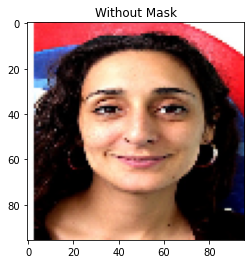

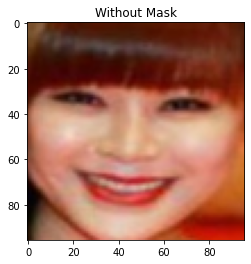

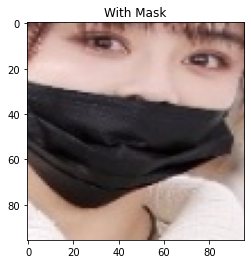

In [147]:
classes = {0:'With Mask', 1:'Without Mask'}

def plot_sample(X,y,index):
    plt.figure()
    plt.imshow(X[index])
    plt.title(classes[y[index]])

# Let's try to print the first 5 indexes in the training set
for i in range(0, 3):
    plot_sample(X_trn,y_trn,i)
    

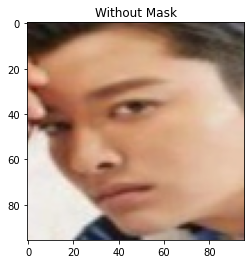

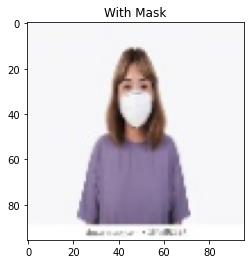

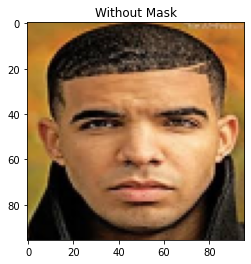

In [148]:
# Let's try to print the first 5 indexes in the testing set
for i in range(0, 3):
    plot_sample(X_tst,y_tst,i)

# Normalize the image data by dividing 255

In [149]:
X_trn = X_trn / 255
X_tst = X_tst / 255

# Let us now initialize our first CNN model

In [20]:
%%time
# initialize the layers of neural network
cnn2 = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size = (3,3) , activation='relu', input_shape=(96,96,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size = (3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # dense
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

#cnn2.compile(optimizer = 'adam',
#            loss = 'sparse_categorical_crossentropy',
#            metrics = ['accuracy']
#           )


#history  = cnn2.fit(X_trn,y_trn,epochs=10, validation_data=(X_tst,y_tst))

Epoch 1/10
189/189 [==============================] - 23s 117ms/step - loss: 0.4003 - accuracy: 0.8353 - val_loss: 0.2533 - val_accuracy: 0.9027
Epoch 2/10
189/189 [==============================] - 22s 118ms/step - loss: 0.2399 - accuracy: 0.9050 - val_loss: 0.2423 - val_accuracy: 0.8981
Epoch 3/10
189/189 [==============================] - 23s 120ms/step - loss: 0.1832 - accuracy: 0.9263 - val_loss: 0.1840 - val_accuracy: 0.9358
Epoch 4/10
189/189 [==============================] - 23s 122ms/step - loss: 0.1357 - accuracy: 0.9469 - val_loss: 0.1731 - val_accuracy: 0.9351
Epoch 5/10
189/189 [==============================] - 23s 122ms/step - loss: 0.0876 - accuracy: 0.9674 - val_loss: 0.1820 - val_accuracy: 0.9418
Epoch 6/10
189/189 [==============================] - 22s 117ms/step - loss: 0.0661 - accuracy: 0.9758 - val_loss: 0.1997 - val_accuracy: 0.9398
Epoch 7/10
189/189 [==============================] - 22s 114ms/step - loss: 0.0392 - accuracy: 0.9871 - val_loss: 0.2482 - val_ac

# We have an accuracy of 93.85%! 

In [21]:
#loss, accuracy = cnn2.evaluate(X_tst, y_tst, verbose=1)
#print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

48/48 [==============================] - 2s 31ms/step - loss: 0.2673 - accuracy: 0.9451
Test: accuracy = 0.945069  ;  loss = 0.267302


# Saving the model as a h5 file to reuse in the future without training it again

In [150]:
# save the trained cnn model with 80% accuracy
if os.path.isfile('mask_detector.h5') is False:
    cnn2.save('mask_detector.h5')

# we can now load it by calling load_model as written below--

In [151]:
new_model = load_model('mask_detector.h5')
new_model.evaluate(X_tst,y_tst)

48/48 [==============================] - 2s 35ms/step - loss: 0.2673 - accuracy: 0.9451


[0.2673022747039795, 0.9450694918632507]

# Display some good results

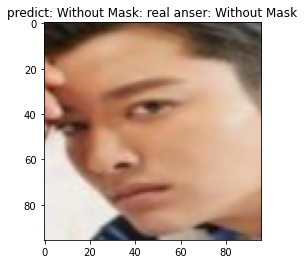

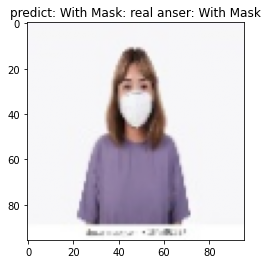

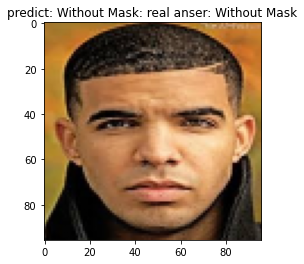

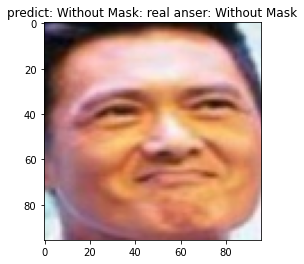

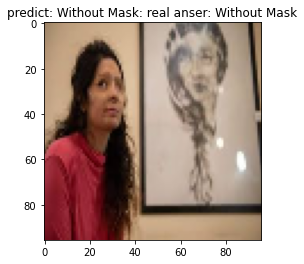

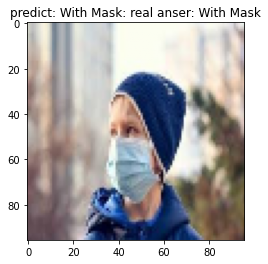

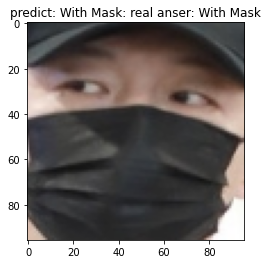

In [152]:
y_preds = new_model.predict(X_tst)
y_result = [np.argmax(element) for element in y_preds]
for i in range(0,7):
    if y_result[i] == y_tst[i]:
        plt.figure()
        plt.imshow(X_tst[i])
        plt.title('predict: ' + classes[y_result[i]] + ': real anser: ' + classes[y_tst[i]])

# Let's display some false results

83 results out of  1511 are wrong


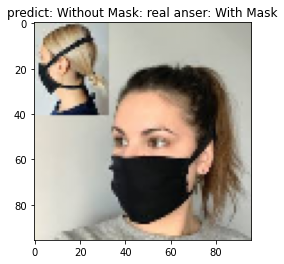

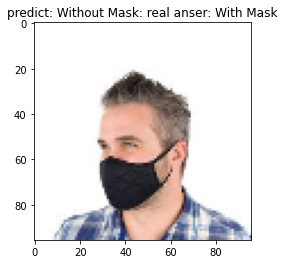

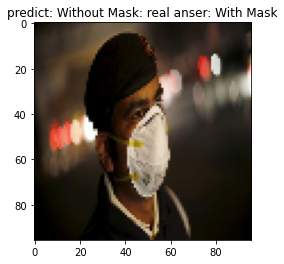

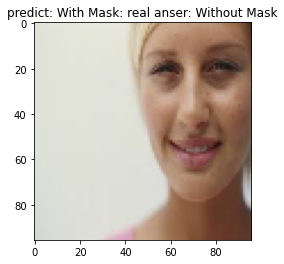

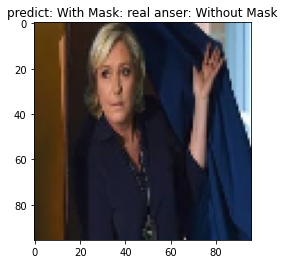

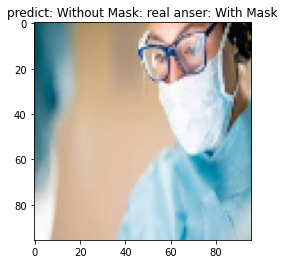

In [153]:
counter = 0
imageDisplayCounter = 0
for i in range(0,len(y_result)):
    if y_result[i] != y_tst[i]:
        if imageDisplayCounter < 6:
            plt.figure()
            plt.imshow(X_tst[i])
            plt.title('predict: ' + classes[y_result[i]] + ': real anser: ' + classes[y_tst[i]])
            imageDisplayCounter += 1
        counter += 1
print(counter , 'results out of ' , len(y_tst), 'are wrong')

# We have only used the testing set from the dataset to test our accuracy

so now let us test it with some random pictures I have found on google image

-- let us take a look at the pictures I will be using

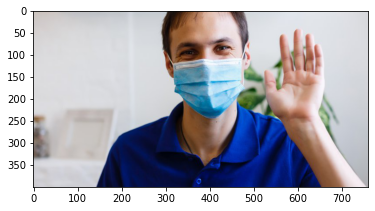

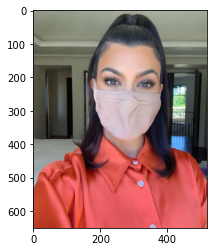

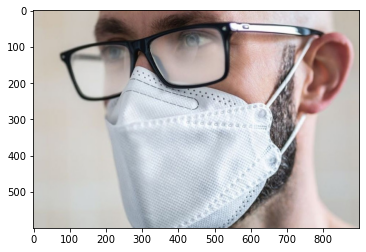

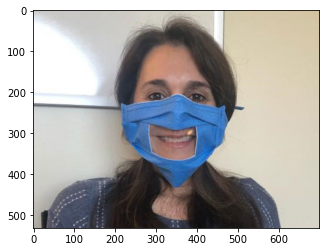

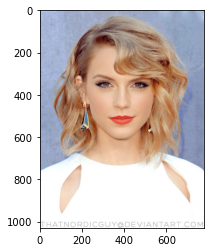

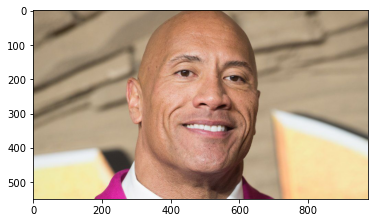

<Figure size 432x288 with 0 Axes>

In [163]:
x_test_list = []
for i in range(1,7):
    path = 'images/moreTests/test' + str(i) + '.png'
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.figure()
    image = cv2.resize(image, (96,96))
    x_test_list.append(image)

# Now let's see whether we have the right result

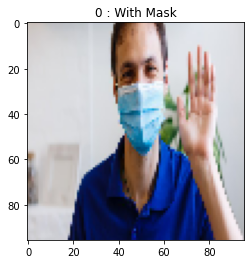

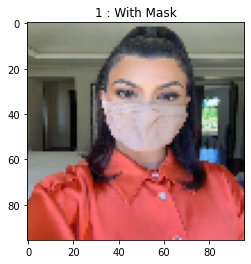

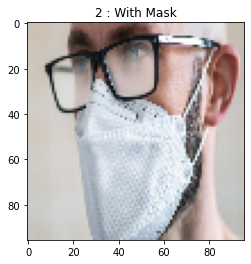

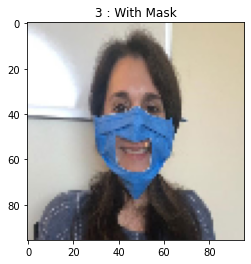

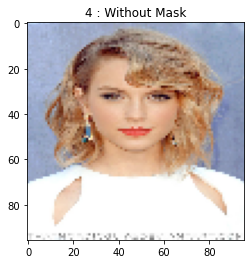

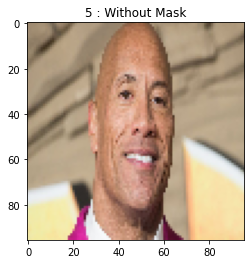

<Figure size 432x288 with 0 Axes>

In [164]:
x_test_list = np.array(x_test_list)
y_preds = new_model.predict(x_test_list)
y_result = [np.argmax(element) for element in y_preds]
for i in range(0,len(y_result)):
    plt.imshow(x_test_list[i])
    plt.title(str(i) + ' : ' + classes[y_result[i]])
    plt.figure()

# comments on the result:

All external images have the right result. Even with image 3, the model predicts it as "with mask" even though her mouth is showing

We can now move on to predict in real time

In [158]:
def predit(model, imagePath):
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (96,96))
    y_preds = model.predict(np.array([image])/255)
    y_result = [np.argmax(element) for element in y_preds]
    #print(classes[y_result[0]])
    return classes[y_result[0]]


# using opencv's videoCapture, we can test the image saved in each frame in real time with our webcam 

press q to quit

In [165]:
cap = cv2.VideoCapture(0)
label = ''
while True:
    ret, frame = cap.read()
    font = cv2.FONT_HERSHEY_SIMPLEX
    frame_copy = cv2.putText(frame.copy(),label,(50,50),font,2,5) 
    cv2.imshow('frame',frame_copy)    
    imagename = os.path.join('images/real-time', 'liveTaken.jpg')
    cv2.imwrite(imagename, frame)
    label = predit(new_model,imagename)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()



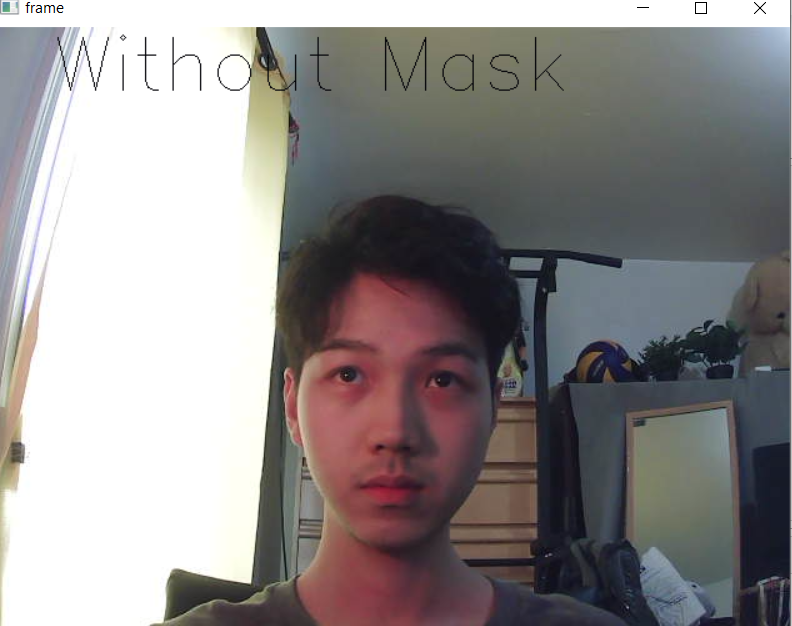

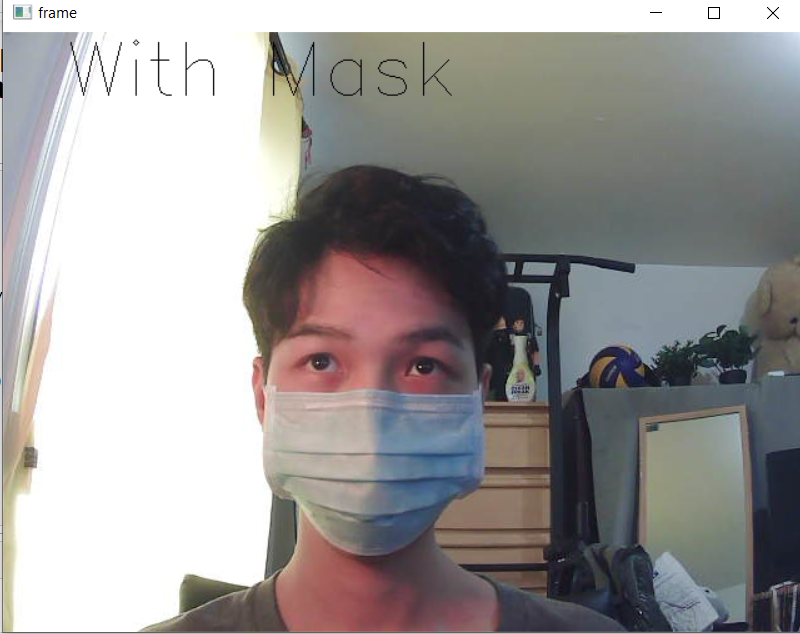

# Final comments
The detection mainly works the best with a background that has uniform color and the person's face located in the middle of the screen. It does not work very well when the overall brightness is dark because it is hard to detect the human's face as it blends in the background